<a href="https://colab.research.google.com/github/HenHimA1/A1/blob/master/AMPDs_KNN_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('/content/drive/My Drive/Electricity_P.csv', delimiter=",")

In [4]:
data.shape

(1051200, 24)

In [5]:
data1 = data
data1['UNIX_TS'] = [datetime.fromtimestamp(waktu) for waktu in data['UNIX_TS']]

In [6]:
data1 = data1.set_index("UNIX_TS")

In [7]:
data1.shape

(1051200, 23)

In [8]:
data1.head()

,WHE,RSE,GRE,MHE,B1E,BME,CWE,DWE,EQE,FRE,HPE,OFE,UTE,WOE,B2E,CDE,DNE,EBE,FGE,HTE,OUE,TVE,UNE
UNIX_TS,,,,,,,,,,,,,,,,,,,,,,,
2012-04-01 07:00:00,918,43,2,873,0,352,0,0,41,106,36,62,9,0,58,0,30,0,0,4,0,37,138
2012-04-01 07:01:00,913,43,0,870,0,354,0,0,35,107,37,61,9,0,58,0,30,0,0,4,0,37,138
2012-04-01 07:02:00,872,43,2,827,0,354,0,0,41,107,38,61,9,0,8,0,30,0,0,4,0,37,138
2012-04-01 07:03:00,872,43,2,827,0,354,0,0,40,106,37,61,9,0,7,0,30,0,0,4,0,37,142
2012-04-01 07:04:00,772,41,2,729,0,352,0,0,40,106,36,61,9,0,8,0,31,0,0,4,0,37,45


In [9]:
output_label = ["CWE", "DWE", "WOE", "CDE", "FGE", "HPE"]

In [10]:
data_proses = {}
data_proses["UNIX_TS"] = data1.index
data_proses["Power"] = data1[output_label].to_numpy().sum(axis=1)

In [11]:
for i in output_label:
  data_proses[i] = data1[i].to_numpy()

In [12]:
output_cluster = []
centroid = np.array([0,100]).reshape(-1,1)
for index, content in enumerate(output_label):
  output_cluster.append("%s%s" %(content,index))
  kmeans = KMeans(n_clusters=2,init=centroid).fit(data_proses[content].reshape(-1, 1))
  data_proses["%s%s" %(content,index)] = kmeans.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: 

In [13]:
jarak = int(len(data_proses['UNIX_TS'])/10)

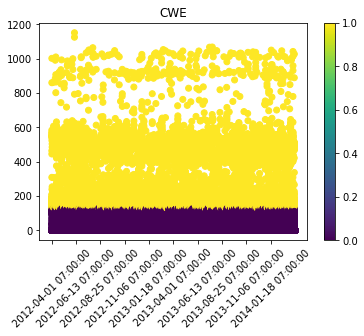

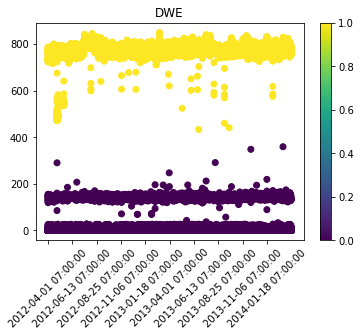

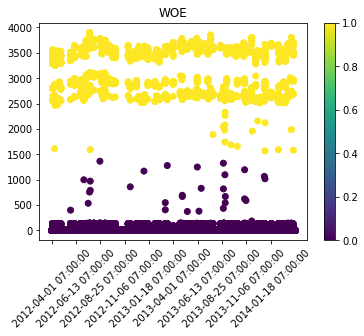

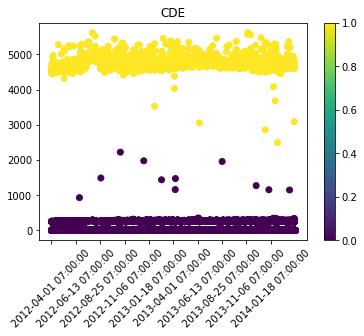

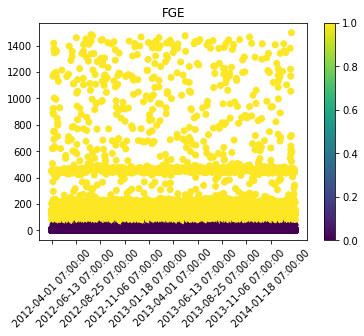

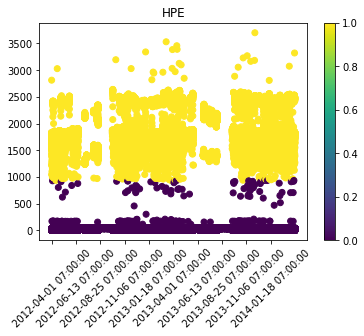

In [14]:
for index, content in enumerate(output_label):  
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(content)
  plt.scatter(data_proses["UNIX_TS"],data_proses[content],c=data_proses["%s%s" %(content,index)])
  axes.set_xticks(data_proses["UNIX_TS"][::jarak])
  axes.set_xticklabels(data_proses["UNIX_TS"][::jarak], rotation=45)
  plt.colorbar()
  plt.show()

In [15]:
data_proses_pd = pd.DataFrame.from_dict(data_proses)
data_proses_pd = data_proses_pd.set_index("UNIX_TS")

In [16]:
train_val = int(data_proses_pd.shape[0] * 0.1)
test_val = int(data_proses_pd.shape[0] * 0.025)

In [17]:
train_set = data_proses_pd.iloc[0:train_val]
test_set = data_proses_pd.iloc[train_val:train_val + test_val]

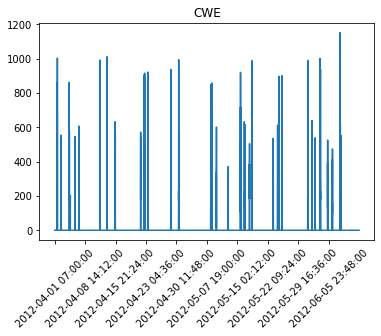

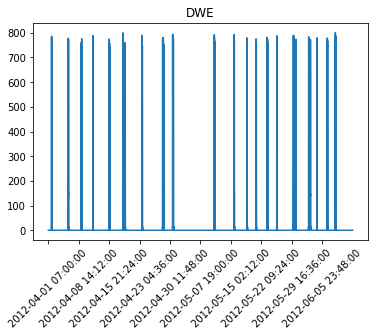

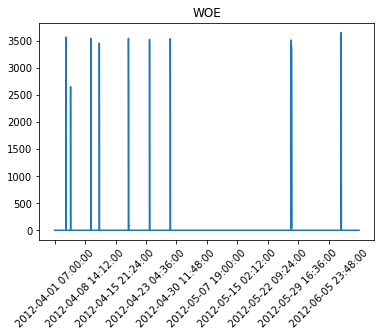

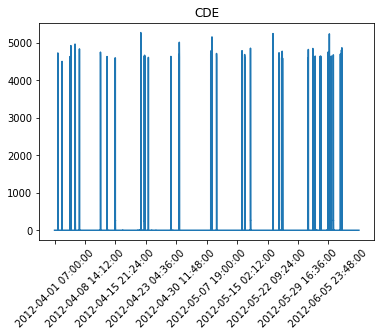

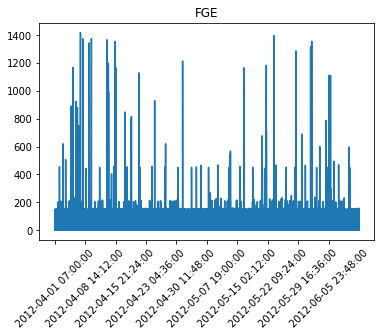

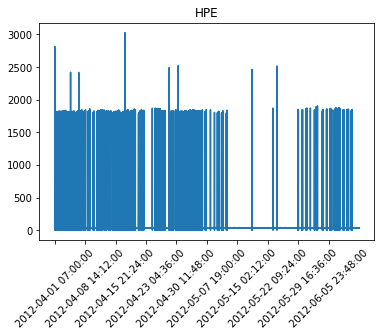

In [18]:
for index,content in enumerate(output_label):
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(content)
  plt.plot(train_set.index, train_set[content])
  axes.set_xticks(train_set.index[::int(train_set.shape[0]/10)])
  axes.set_xticklabels(train_set.index[::int(train_set.shape[0]/10)], rotation=45)
  plt.show()

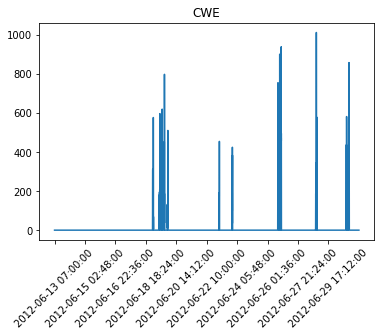

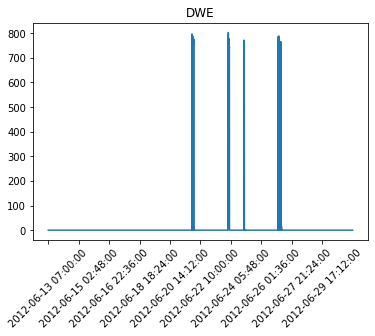

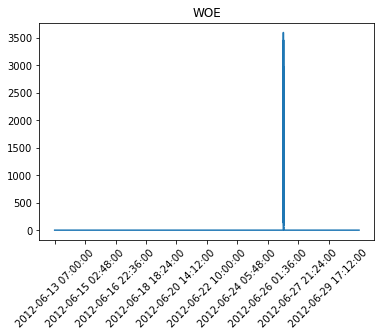

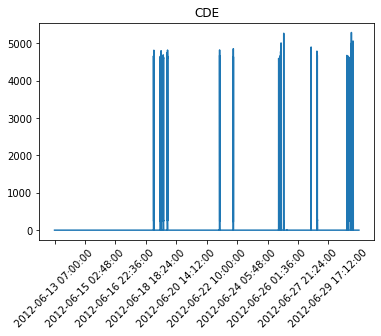

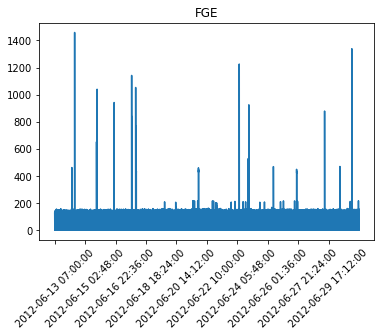

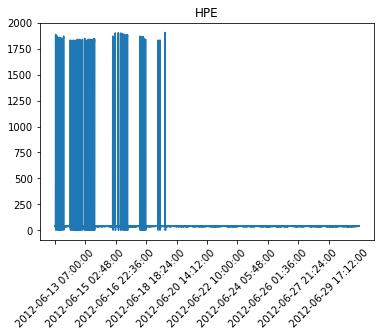

In [19]:
for index,content in enumerate(output_label):
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(content)
  plt.plot(test_set.index, test_set[content])
  axes.set_xticks(test_set.index[::int(test_set.shape[0]/10)])
  axes.set_xticklabels(test_set.index[::int(test_set.shape[0]/10)], rotation=45)
  plt.show()

In [20]:
X_train_class = train_set["Power"].to_numpy().reshape(-1,1)
X_test_class = test_set["Power"].to_numpy().reshape(-1,1)
Y_train_class = train_set[output_cluster]
Y_test_class = test_set[output_cluster] 

In [21]:
X_train_regr = train_set[["Power"] + output_cluster]
X_test_regr = test_set[["Power"] + output_cluster]
Y_train_regr = train_set[output_label]
Y_test_regr = test_set[output_label]

In [22]:
akurasi_class = []
for i in range(1,10):
  knn_class = KNeighborsClassifier(n_neighbors=i).fit(X_train_class, Y_train_class)
  predict_class = knn_class.predict(X_test_class)
  akurasi_class.append(accuracy_score(Y_test_class,predict_class))

In [23]:
akurasi_regre = []
for i in range(1,10):
  knn_regre = KNeighborsRegressor(n_neighbors=i).fit(X_train_regr, Y_train_regr)
  predict_regre = knn_regre.predict(X_test_regr)
  akurasi_regre.append(mean_squared_error(Y_test_regr,predict_regre))

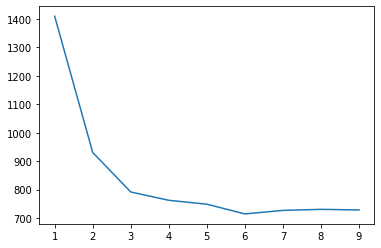

In [24]:
plt.plot(range(1,10),akurasi_regre)
plt.show()

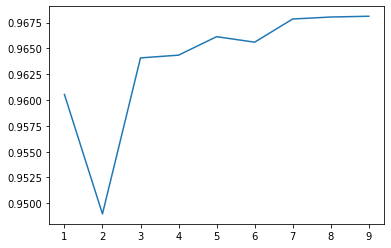

In [25]:
plt.plot(range(1,10),akurasi_class)
plt.show()

In [26]:
knn_class = KNeighborsClassifier(n_neighbors=9, metric='minkowski')
knn_regre = KNeighborsRegressor(n_neighbors=9, metric='minkowski')

In [27]:
knn_class.fit(X_train_class,Y_train_class)
predict_class = knn_class.predict(X_test_class)

In [28]:
knn_regre.fit(X_train_regr,Y_train_regr)
predict_regre = knn_regre.predict(X_test_regr)

In [29]:
print("Nilai Akurasi =",accuracy_score(Y_test_class, predict_class))
print("Jumlah Data Prediksi Yang benar =",accuracy_score(Y_test_class, predict_class, normalize=False))
print("Jumlah Data Prediksi =",Y_test_class.shape[0])

Nilai Akurasi = 0.9681126331811263
Jumlah Data Prediksi Yang benar = 25442
Jumlah Data Prediksi = 26280


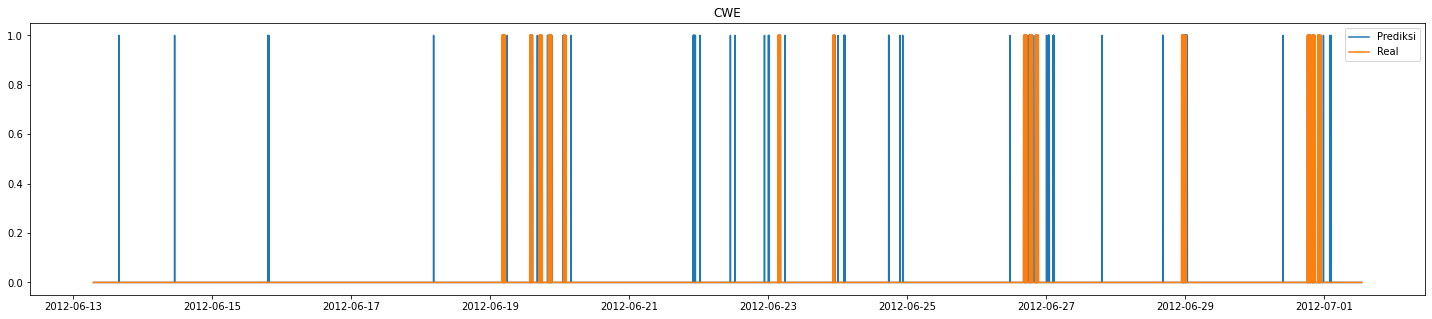

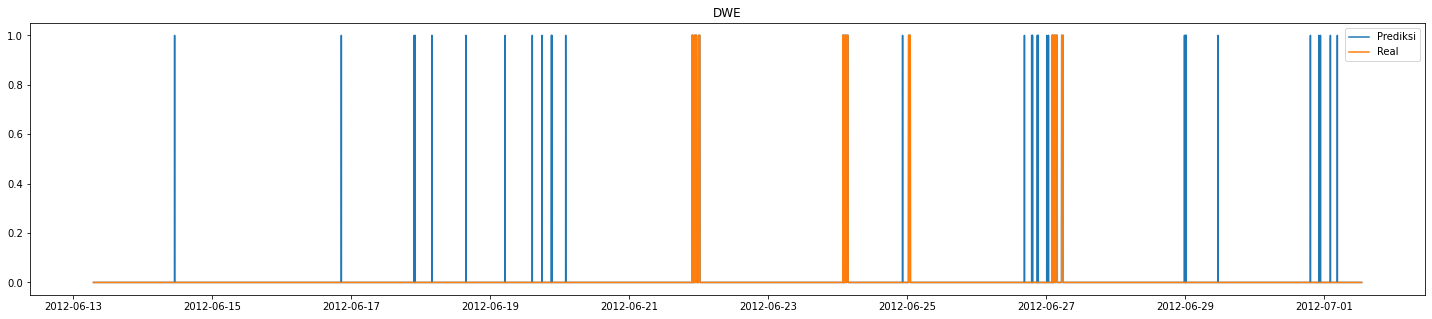

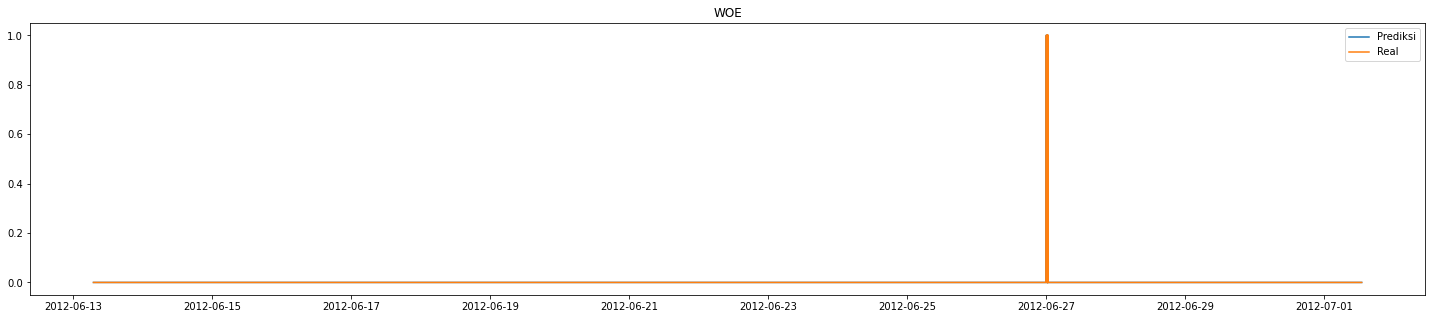

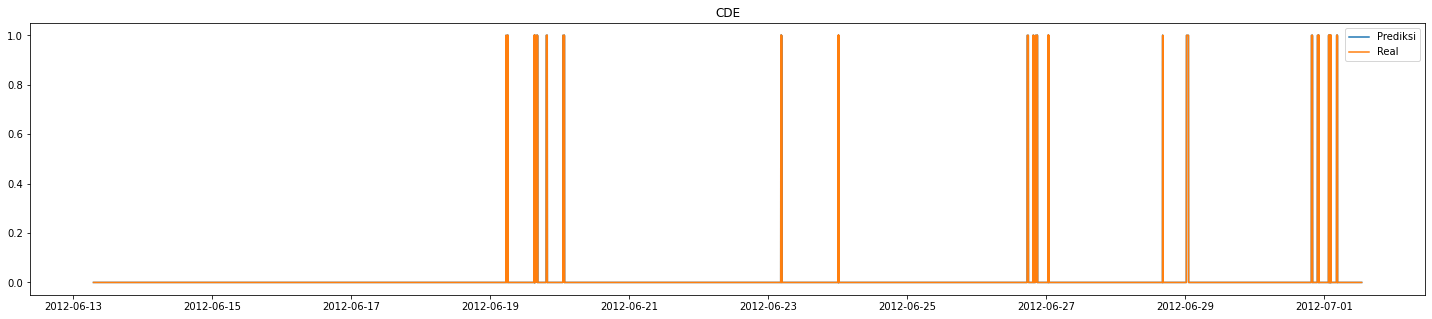

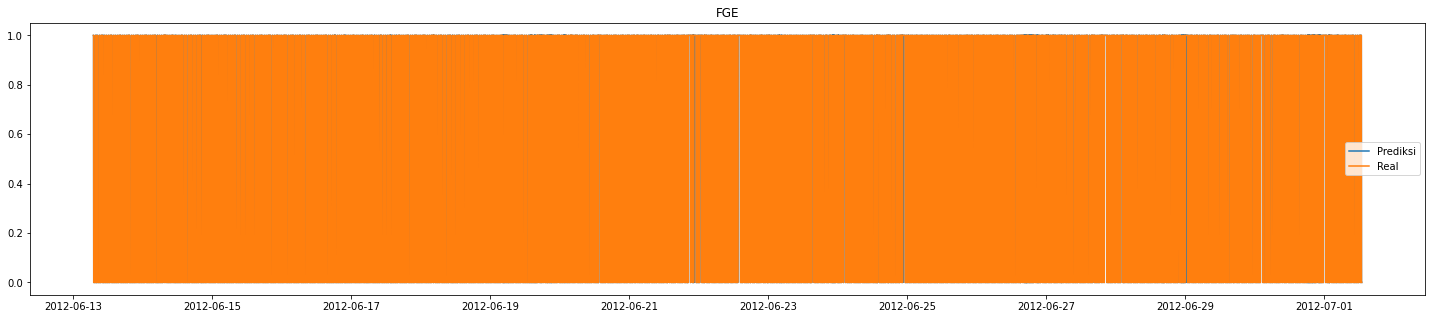

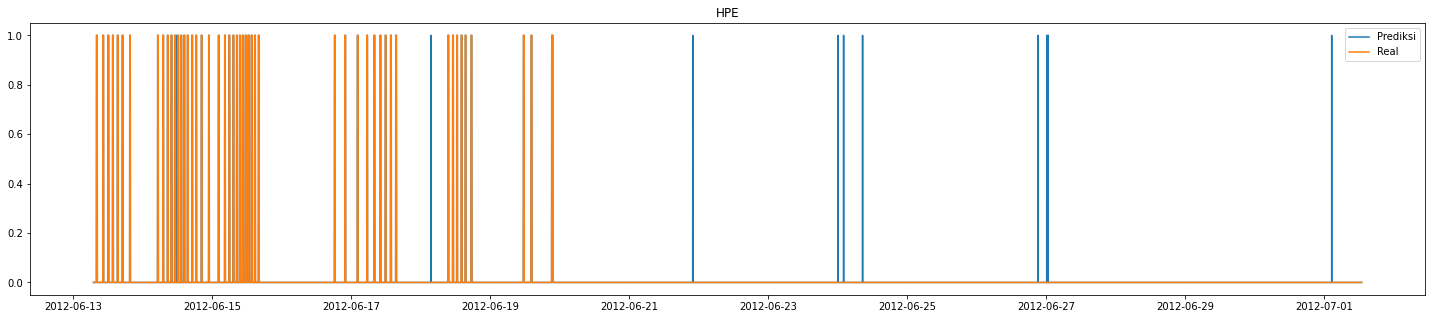

In [30]:
for i,e in enumerate(output_label):
  fig = plt.figure(figsize=(25,5))
  axes = fig.add_subplot(111)
  plt.title(e)
  plt.plot(Y_test_class.index,predict_class[:,i], label="Prediksi")
  plt.plot(Y_test_class.index,Y_test_class["%s%s"% (e,i)], label="Real")
  plt.legend()
  plt.show()

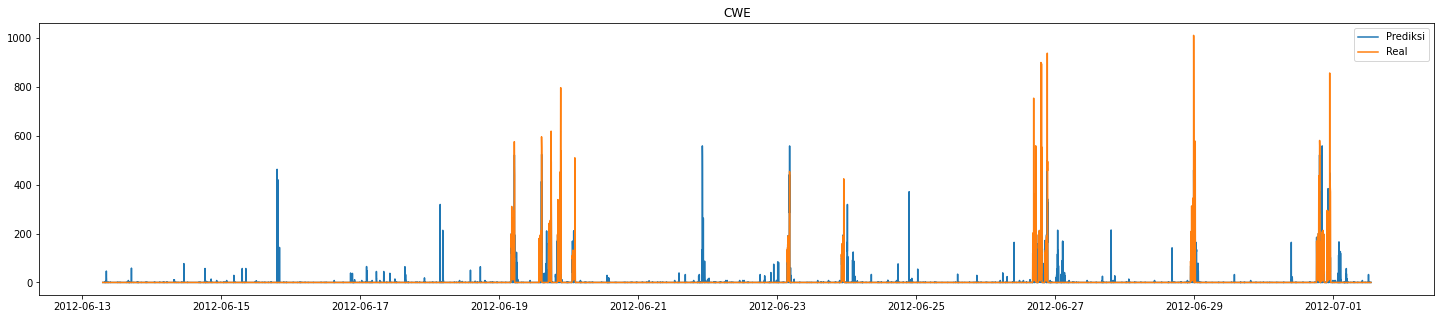

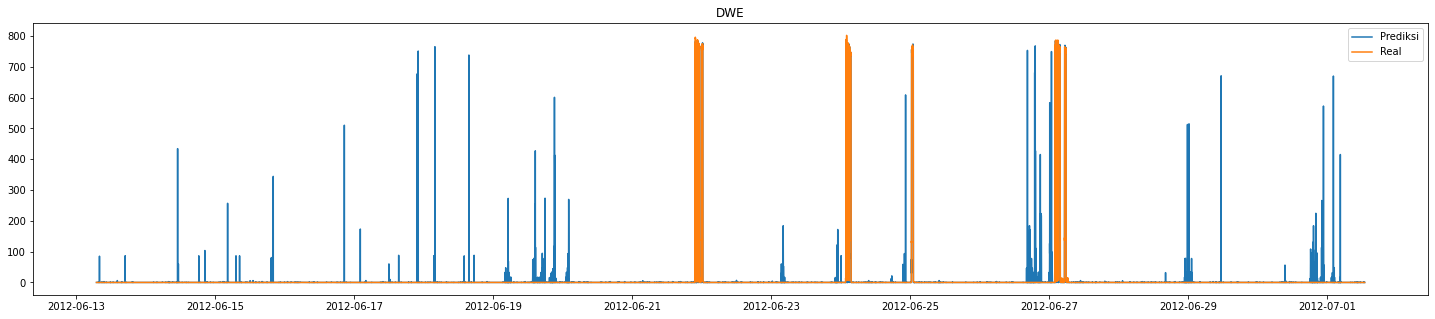

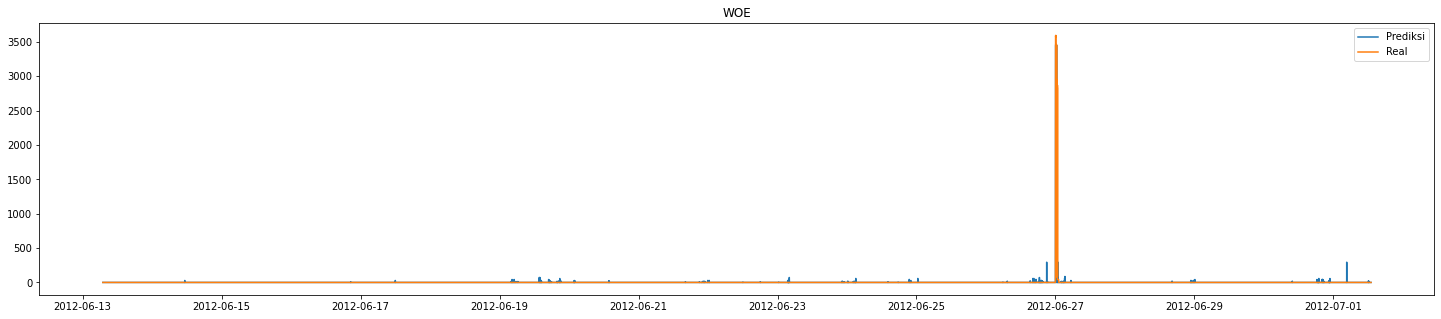

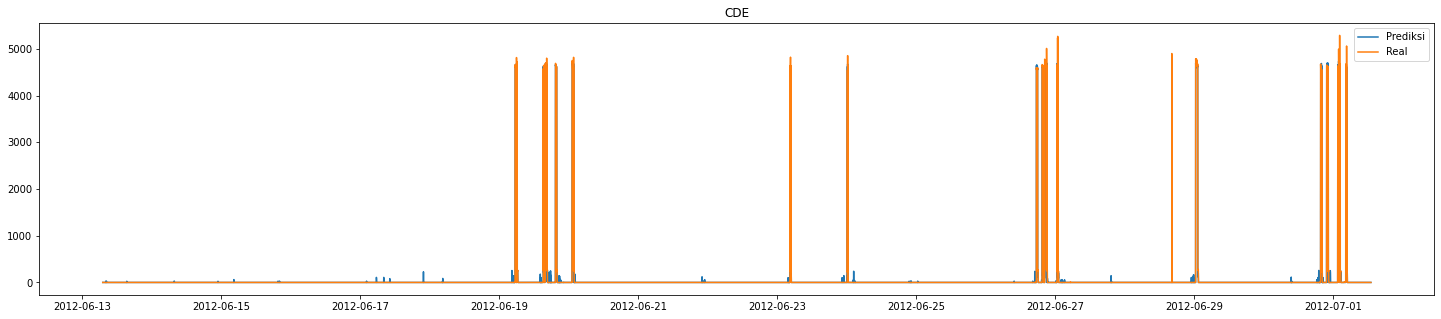

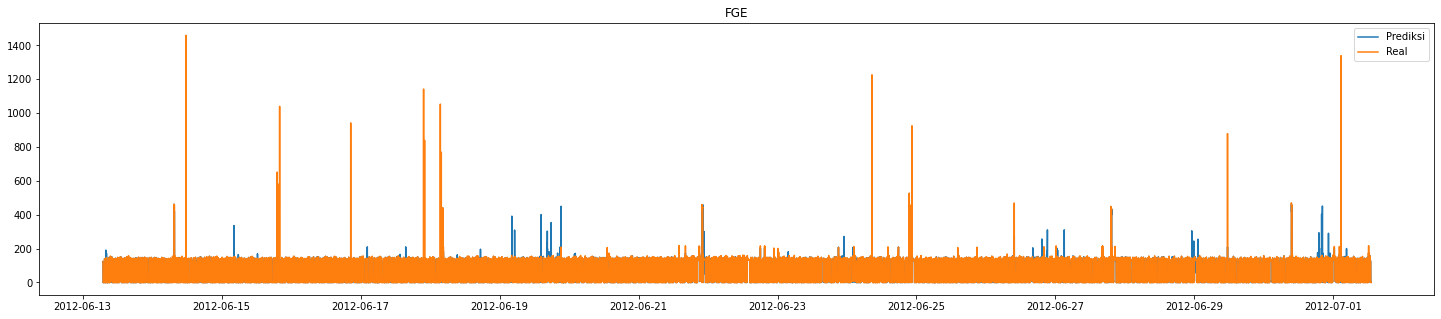

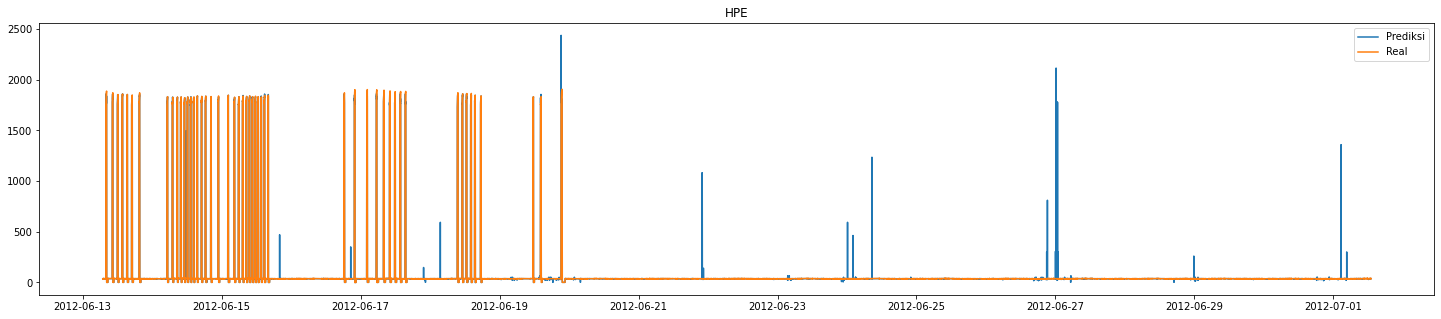

In [31]:
for i,e in enumerate(output_label):
  fig = plt.figure(figsize=(25,5))
  axes = fig.add_subplot(111)
  plt.title(e)
  plt.plot(Y_test_regr.index,predict_regre[:,i],label="Prediksi")
  plt.plot(Y_test_regr.index,Y_test_regr[e],label="Real")
  plt.legend()
  plt.show()

In [32]:
for i,e in enumerate(output_label):
  print(e,'=',accuracy_score(Y_test_class["%s%s" % (e,i)],predict_class[:,i]))

CWE = 0.9865296803652968
DWE = 0.9984018264840183
WOE = 0.9998858447488584
CDE = 1.0
FGE = 0.9728310502283105
HPE = 0.9993531202435312


In [33]:
for i,e in enumerate(output_label):
  print(e)
  print("Jumlah Power Prediksi =", sum(predict_regre[:,i]), "Watt")
  print("Jumlah Power Real =", sum(Y_test_regr[e]),"Watt")
  print("Jumlah Energi Prediksi =", sum(predict_regre[:,i])/60,"Wh")
  print("Jumlah Energi Real =", sum(Y_test_regr[e])/60,"Wh")

CWE
Jumlah Power Prediksi = 125758.22222222331 Watt
Jumlah Power Real = 147676 Watt
Jumlah Energi Prediksi = 2095.9703703703885 Wh
Jumlah Energi Real = 2461.266666666667 Wh
DWE
Jumlah Power Prediksi = 251180.55555556036 Watt
Jumlah Power Real = 221868 Watt
Jumlah Energi Prediksi = 4186.342592592673 Wh
Jumlah Energi Real = 3697.8 Wh
WOE
Jumlah Power Prediksi = 61921.999999997795 Watt
Jumlah Power Real = 72814 Watt
Jumlah Energi Prediksi = 1032.0333333332967 Wh
Jumlah Energi Real = 1213.5666666666666 Wh
CDE
Jumlah Power Prediksi = 1772608.555555542 Watt
Jumlah Power Real = 1784689 Watt
Jumlah Energi Prediksi = 29543.4759259257 Wh
Jumlah Energi Real = 29744.816666666666 Wh
FGE
Jumlah Power Prediksi = 1355279.9999997881 Watt
Jumlah Power Real = 1353805 Watt
Jumlah Energi Prediksi = 22587.999999996468 Wh
Jumlah Energi Real = 22563.416666666668 Wh
HPE
Jumlah Power Prediksi = 2256804.111111445 Watt
Jumlah Power Real = 2244981 Watt
Jumlah Energi Prediksi = 37613.401851857416 Wh
Jumlah Energi R